# Equipos 

## Datos

In [115]:
import pandas as pd
# Ajustar la configuración para mostrar todas las filas y columnas
pd.set_option('display.max_rows', None)  # Muestra todas las filas
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.width', None)  # Ancho de la pantalla, sin límite
pd.set_option('display.float_format', '{:,.6f}'.format)  # Formato para mostrar números flotantes
df = pd.read_csv(r".\equipos.csv")
df.head()

,Equipo,Competición,Temporada,Partidos,%Posesion de balon,%Posesion en campo rival,Tiros,Tiros al arco,Goles,Goles esperados,Tiros recibidos,Tiros recibidos al arco,Goles recibidos esperados,Goles recibidos,Puntos por partido,Contra ataques hechos,Contra ataques efectivos hechos,Contra ataques recibidos,Contra ataques efectivos recibidos,Pases totales,Centros,Pases bajo presion,%Pases exitosos totales,%Pases exitosos bajo presion,%Pases exitosos sin presion,Recuperaciones de balon,tiempo_presion,tiempo_presion_ofensiva,tiempo_presion_defensiva,bloqueos,despejes,duelos_ganados,faltas_cometidas,#se_llevan_a_un_defensa,intercepciones
0,Hoffenheim,1. Bundesliga,2015/2016,34,45.877886,17.064502,10.617647,4.176471,1.088235,1.175111,15.147059,6.117647,1.558309,1.411765,1.088235,3.058824,0.088235,3.147059,0.176471,440.941176,9.235294,82.264706,75.440000,66.960000,77.380000,45.470588,144.078232,59.480932,84.597300,23.882353,25.558824,7.323529,15.911765,9.294118,5.705882
1,Bayern Munich,1. Bundesliga,2015/2016,34,72.586284,36.735715,17.088235,7.647059,2.176471,2.052606,6.911765,2.470588,0.604247,0.470588,2.588235,1.970588,0.147059,1.941176,0.058824,754.117647,16.205882,112.029412,87.810000,78.550000,89.430000,47.176471,96.270723,53.325285,42.945438,14.176471,13.382353,4.882353,12.529412,6.558824,4.235294
2,Hertha Berlin,1. Bundesliga,2015/2016,34,49.687784,16.654659,9.029412,3.647059,1.147059,0.980277,11.647059,4.294118,1.177300,1.147059,1.470588,2.441176,0.117647,2.382353,0.088235,492.705882,10.176471,86.117647,79.110000,69.810000,81.080000,43.500000,133.280018,48.488248,84.791770,18.147059,23.058824,7.029412,15.294118,7.500000,4.117647
3,Hamburger SV,1. Bundesliga,2015/2016,34,48.884550,18.171382,10.264706,3.735294,1.029412,1.057563,12.852941,5.058824,1.299124,1.235294,1.205882,2.970588,0.088235,3.029412,0.147059,449.735294,9.117647,88.205882,73.700000,65.490000,75.710000,49.705882,151.333884,56.115093,95.218791,21.882353,24.852941,9.117647,18.500000,10.470588,5.941176
4,Borussia Dortmund,1. Bundesliga,2015/2016,34,63.962745,30.975798,14.705882,6.235294,2.294118,2.157967,7.382353,3.147059,0.870951,0.941176,2.294118,2.529412,0.147059,2.647059,0.058824,669.970588,12.764706,105.058824,84.470000,73.400000,86.530000,49.647059,133.657301,64.745487,68.911813,18.264706,18.323529,7.323529,12.500000,7.500000,4.323529


In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn.cluster import KMeans

equipos = df[['Equipo', 'Competición', 'Temporada']]
all_columns=['Puntos por partido','%Posesion de balon','%Posesion en campo rival','Tiros','Tiros al arco','Goles','Goles esperados',
             'Tiros recibidos','Tiros recibidos al arco','Goles recibidos esperados','Goles recibidos',
             'Contra ataques hechos', 'Contra ataques efectivos hechos', 'Contra ataques recibidos', 'Contra ataques efectivos recibidos',
             'Pases totales', 'Centros','Pases bajo presion', '%Pases exitosos totales', '%Pases exitosos bajo presion',
             '%Pases exitosos sin presion','Recuperaciones de balon',
             'tiempo_presion','tiempo_presion_ofensiva','tiempo_presion_defensiva',
             'bloqueos','despejes','duelos_ganados','faltas_cometidas','#se_llevan_a_un_defensa','intercepciones']
columns=['%Posesion de balon','Tiros',
             'Tiros recibidos',
             'Contra ataques hechos', 'Contra ataques efectivos hechos',
             'Pases totales', 'Centros', '%Pases exitosos totales',
             'Recuperaciones de balon',
             'tiempo_presion_ofensiva','tiempo_presion_defensiva',
             'bloqueos','despejes','duelos_ganados','faltas_cometidas','intercepciones']
df1 = df
X = df[columns]

# Estandarizamos los datos
sc = StandardScaler()
X_std = sc.fit_transform(X)

pca = PCA()
x_pca = pca.fit_transform(X_std)

# Calcular la varianza acumulada
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)

# Determinar el número de componentes que explican al menos el 80% de la varianza
n_componentes = np.argmax(varianza_acumulada >= 0.80) + 1

pca = PCA(n_components=n_componentes)
X_pca = pca.fit_transform(X_std)
pd.options.mode.chained_assignment = None

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

columnss = []
for i in range(n_componentes):
    columnss.append(f'Componente {i+1}')

# Crear un DataFrame con los datos PCA y los clústeres
pca_df = pd.DataFrame(data=X_pca, columns=columnss)
pca_df['Cluster'] = clusters

four_clus=df[columns]
four_clus['Cluster'] = clusters
df['Cluster'] = clusters

k1=four_clus[four_clus['Cluster']==1].mean()
k0=four_clus[four_clus['Cluster']==0].mean()
k2=four_clus[four_clus['Cluster']==2].mean()
grupos=pd.concat([k0,k1,k2],axis=1)
df_clusters=df
df_clusters['Cluster'] = clusters


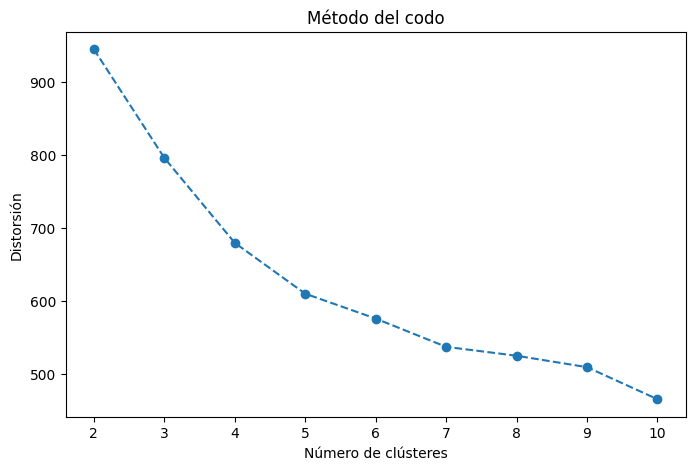

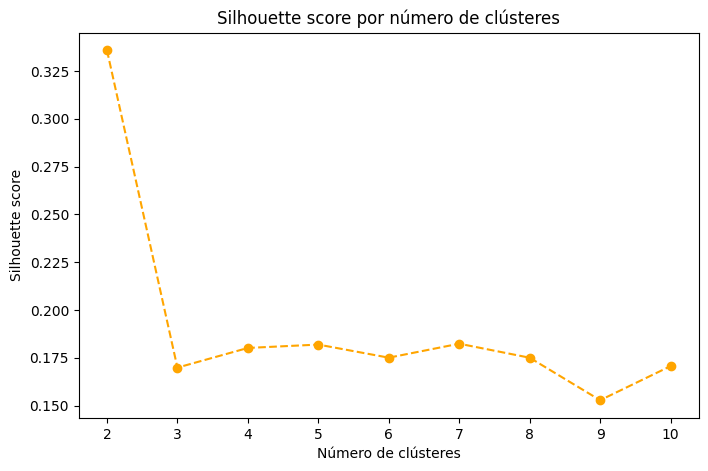

In [47]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

distortions = []
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_pca)
    distortions.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_pca, clusters))

# Gráfico del método del codo
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), distortions, marker='o', linestyle='--')
plt.title('Método del codo')
plt.xlabel('Número de clústeres')
plt.ylabel('Distorsión')
plt.show()

# Silhouette score
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), sil_scores, marker='o', linestyle='--', color='orange')
plt.title('Silhouette score por número de clústeres')
plt.xlabel('Número de clústeres')
plt.ylabel('Silhouette score')
plt.show()


## Análisis de estilos de juegos en el fútbol y su efectividad

In [48]:
import plotly.express as px

# Crear el gráfico de dispersión interactivo
fig = px.scatter(
    pca_df,
    x='Componente 1',
    y='Componente 2',
    color='Cluster',
    hover_data={'Componente 1': False, 'Componente 2': False, 'Cluster': True, 'Equipo': df['Equipo']},
    # color_continuous_scale='autumn',
    title='Visualización de Clústeres después de PCA'
)

# Ajustar el diseño
fig.update_traces(marker=dict(size=10, opacity=0.8))
fig.update_layout(
    width=900,
    height=600,
    legend_title_text='Cluster'
)

# Mostrar el gráfico
fig.show()

Empezaremos realizando un análisis por liga agrupando a los equipos en base a sus características de juego. Los grupos inicialmente se realizaron considerando todos los equipos de las 5 ligas y todas sus características de juego menos sus puntos por partido, esto se hizo para poder observar si el estilo de juego impacta de alguna forma a los puntos obtenidos, tras un análisis obtuvimos que el número óptimo para los grupos era 3. Al obtener sus grupos los volvimos a separar en sus ligas para visualizar el estilo de juego de las ligas europeas y poder analizar qué grupo es el más eficiente a la hora de obtener puntos

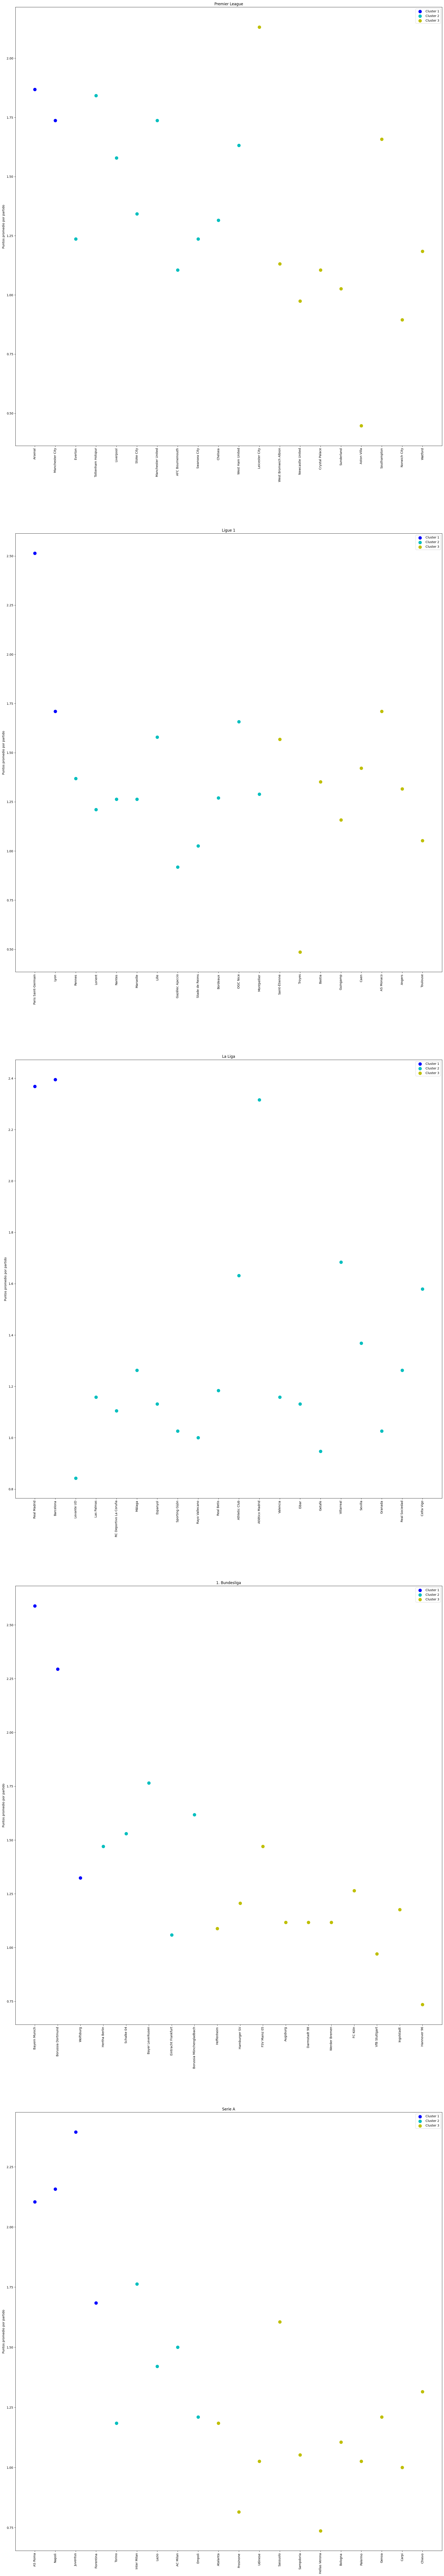

In [49]:
fig, axes = plt.subplots(5,1, figsize=(25,150))
competiciones=['Premier League','Ligue 1','La Liga','1. Bundesliga','Serie A']
colores=['b','c','y']
for i in range(len(competiciones)):
  ax=axes[i]
  comp=df[df['Competición']==competiciones[i]]
  for j in range(3):
    compi=comp[comp['Cluster']==j]
    ax.scatter(compi['Equipo'],compi['Puntos por partido'],c=colores[j],label=f'Cluster {j+1}',s=100)
  ax.set_ylabel('Puntos promedio por partido')
  ax.tick_params(axis="x", labelrotation=90)
  ax.set_title(competiciones[i])
  ax.legend()

In [50]:
import pandas as pd
import plotly.express as px

# Lista de competiciones
competiciones = ['Premier League', 'Ligue 1', 'La Liga', '1. Bundesliga', 'Serie A']
colores = ['blue', 'cyan', 'yellow', 'green', 'red']

# Crear un gráfico vacío
fig = px.scatter(title='Puntos Promedio por Partido de cada Equipo y Cluster al que pertenece')

# Iterar sobre las competiciones para añadir los puntos
for j in range(5):
    compi = df[df['Cluster'] == j]
    fig.add_scatter(
        y=compi['Puntos por partido'],
        mode='markers',
        name=f'Cluster {j + 1}',
        marker=dict(size=10, color=colores[j]),
        text=compi['Equipo'],  # Nombre del equipo en el tooltip
        hoverinfo='text'  # Muestra solo el texto en el tooltip
    )

# Configurar la apariencia del gráfico
fig.update_layout(
    yaxis_title='Puntos promedio por partido',
    xaxis_title='Equipos',
    xaxis_tickangle=-45,
    legend_title='Clusters',
    xaxis=dict(showticklabels=False)  # Oculta los valores del eje x
)

# Mostrar el gráfico
fig.show()

Al dividir los equipos en sus respectivos clusters y graficarlos contra el los puntos por partido quedó claro que el grupo que más puntos por partido hace es el grupo 1, seguido por el 2 y por último el grupo 3. Lo que sigue va a ser analizar sus estilos de juego para buscar porqué hay grupos más eficientes que otros

In [51]:
import plotly.express as px
import pandas as pd

fig = px.box(df, x="Cluster", y="Puntos por partido", points="all", title="Boxplot Interactivo por Grupo", hover_data=["Equipo"])
fig.show()

In [52]:
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler

# Seleccionar las columnas y los equipos para cada clúster
columns = ['%Posesion de balon', 'Tiros', 'Tiros recibidos', 'Contra ataques hechos',
           'Contra ataques efectivos hechos', 'Pases totales', 'Centros', '%Pases exitosos totales',
           'Recuperaciones de balon', 'tiempo_presion_ofensiva', 'tiempo_presion_defensiva',
           'bloqueos', 'despejes', 'duelos_ganados', 'faltas_cometidas', 'intercepciones']

# Agrupar los datos por clúster y equipo, y calcular la media
radar_data = df.groupby(['Cluster', 'Equipo'])[columns].mean().reset_index()

# Estandarizar las métricas usando StandardScaler
scaler = StandardScaler()
radar_data[columns] = scaler.fit_transform(radar_data[columns])

# Crear un radar por clúster
cluster_figures = []

# Crear un radar por clúster
for cluster in radar_data['Cluster'].unique():
    fig = go.Figure()
    cluster_data = radar_data[radar_data['Cluster'] == cluster]

    for _, row in cluster_data.iterrows():
        # Añadir el primer valor de r al final para cerrar la línea
        values = row[columns].values.tolist()
        values.append(values[0])  # Añadir el primer valor al final

        fig.add_trace(
            go.Scatterpolar(
                r=values,
                theta=columns + [columns[0]],  # Añadir el primer valor de theta al final
                fill='none',
                mode='lines+markers',
                name=f"{row['Equipo']}",
                hoverinfo='name'
            )
        )

    # Configurar el diseño del gráfico sin la leyenda
    fig.update_layout(
        polar=dict(
            radialaxis=dict(visible=True, range=[-3, 3])  # Rango ajustado por estandarización
        ),
        title=f"Gráfico de Radar - Clúster {cluster}",
        showlegend=False,  # Desactivar la leyenda
        width=800,
        height=700
    )

    # Mostrar la figura
    fig.show()


In [53]:
def graficar_radar_equipo(df, equipo, columnas):
    """
    Esta función genera un gráfico de radar para un equipo específico.

    Parámetros:
    - df: DataFrame con los datos estandarizados y las columnas relevantes.
    - equipo: Nombre del equipo para el cual se generará el gráfico de radar.
    - columnas: Lista de columnas que se usarán para el gráfico de radar.
    """
    # Filtrar los datos para el equipo específico
    equipo_data = df[df['Equipo'] == equipo]  # Suponiendo que el DataFrame tiene una columna 'Equipo'

    # Verificar si el equipo está en el DataFrame
    if equipo_data.empty:
        print(f"El equipo '{equipo}' no se encuentra en el DataFrame.")
        return

    # Establecer los valores para el gráfico de radar
    valores = equipo_data[columnas].values.flatten().tolist()
    valores += valores[:1]  # Cerrar la gráfica

    # Ángulos para cada categoría
    angulos = np.linspace(0, 2 * np.pi, len(columnas), endpoint=False).tolist()
    angulos += angulos[:1]  # Cerrar el círculo

    # Crear el gráfico de radar
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    # Dibuja la línea
    ax.plot(angulos, valores, linewidth=2, linestyle='solid', label=equipo)

    # Rellenar el área
    ax.fill(angulos, valores, alpha=0.25)

    # Poner las etiquetas
    ax.set_yticklabels([])
    ax.set_xticks(angulos[:-1])
    ax.set_xticklabels(columnas, rotation=45)

    # Título
    plt.title(f'Gráfico de Radar del Equipo: {equipo}', size=20, color='black', y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

    plt.show()


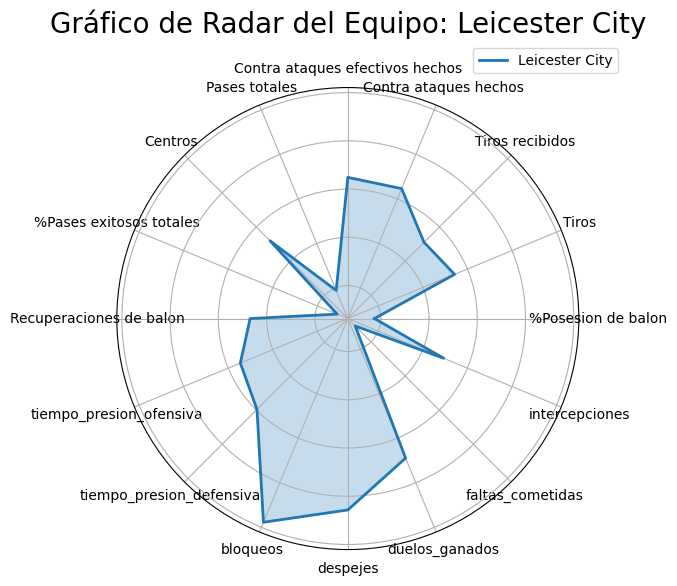

In [54]:
# Ejemplo de uso
graficar_radar_equipo(radar_data, 'Leicester City', columns)

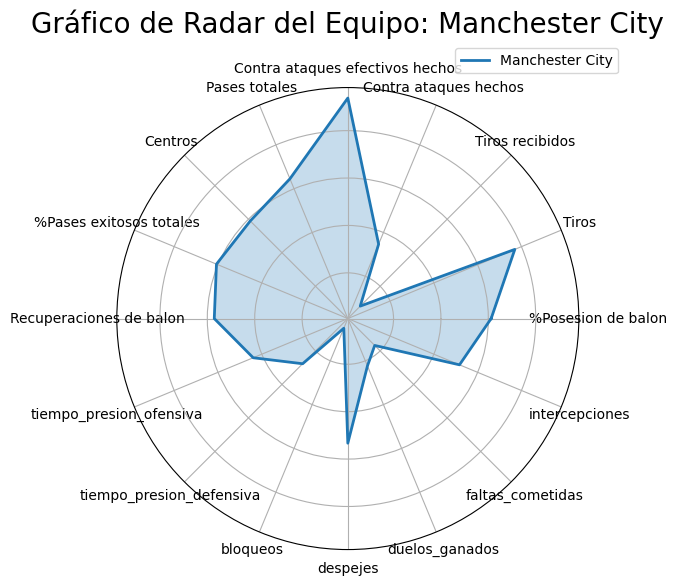

In [55]:
# Ejemplo de uso
graficar_radar_equipo(radar_data, 'Manchester City', columns)

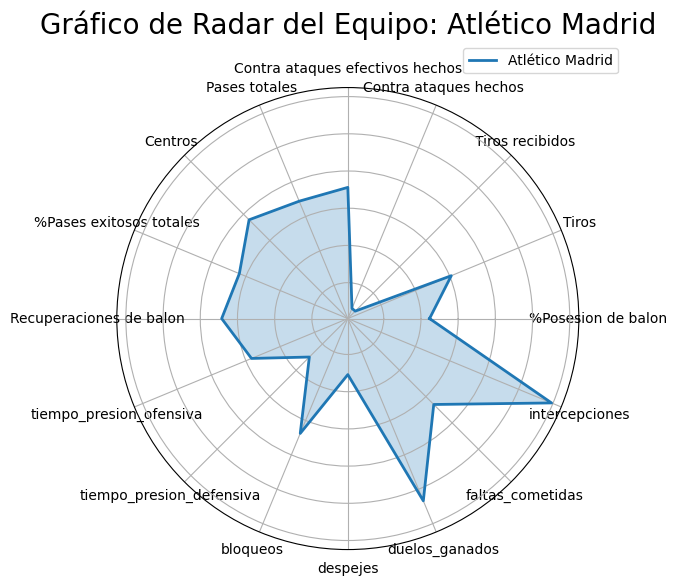

In [56]:
# Ejemplo de uso
graficar_radar_equipo(radar_data, 'Atlético Madrid', columns)

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import shapiro
import statsmodels.api as sm

def verificar_supuestos(X, y, model):
    """
    Verifica los principales supuestos de la regresión lineal.

    X: DataFrame con las variables independientes.
    y: Serie o array con la variable dependiente.
    model: Modelo entrenado (de statsmodels).
    """
    # Predicciones y residuos
    y_pred = model.predict(sm.add_constant(X))
    residuos = y - y_pred

    # 1. Linealidad
    plt.figure(figsize=(7, 5))
    sns.scatterplot(x=y_pred, y=residuos)
    plt.axhline(0, color='red', linestyle='--')
    plt.title("Linealidad: Residuos vs Valores Predichos")
    plt.xlabel("Valores predichos")
    plt.ylabel("Residuos")
    plt.show()

    # 2. Normalidad de los residuos
    plt.figure(figsize=(7, 5))
    sm.qqplot(residuos, line='s', fit=True)
    plt.title("Q-Q Plot para verificar normalidad")
    plt.show()

    stat, p_valor = shapiro(residuos)
    print(f"Prueba de Shapiro-Wilk: Estadístico={stat:.4f}, p-valor={p_valor:.4f}")
    if p_valor > 0.05:
        print("Los residuos parecen seguir una distribución normal.")
    else:
        print("Los residuos no parecen seguir una distribución normal.")

    # 3. Homoscedasticidad
    plt.figure(figsize=(7, 5))
    sns.scatterplot(x=y_pred, y=np.abs(residuos))
    plt.axhline(np.mean(np.abs(residuos)), color='red', linestyle='--')
    plt.title("Homoscedasticidad: Residuos Absolutos vs Valores Predichos")
    plt.xlabel("Valores predichos")
    plt.ylabel("Residuos absolutos")
    plt.show()

    # Prueba de Breusch-Pagan
    _, pval, __, f_pval = het_breuschpagan(residuos, sm.add_constant(X))
    print(f"Prueba de Breusch-Pagan: p-valor={pval:.4f}")
    if pval > 0.05:
        print("No se rechaza la homoscedasticidad.")
    else:
        print("Se rechaza la homoscedasticidad.")

    # 4. Independencia de los residuos
    dw_stat = durbin_watson(residuos)
    print(f"Prueba de Durbin-Watson: Estadístico={dw_stat:.4f}")
    if 1.5 < dw_stat < 2.5:
        print("No parece haber autocorrelación significativa en los residuos.")
    else:
        print("Podría haber autocorrelación en los residuos.")

    # 5. Detección de outliers
    infl = model.get_influence()
    cooks_d = infl.cooks_distance[0]
    plt.figure(figsize=(7, 5))
    plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
    plt.axhline(0.5, color='red', linestyle='--', label='Umbral (0.5)')
    plt.title("Distancia de Cook para detección de outliers")
    plt.xlabel("Índice")
    plt.ylabel("Distancia de Cook")
    plt.legend()
    plt.show()
    print("Observaciones con alta influencia (Cook's Distance > 0.5):")
    print(np.where(cooks_d > 0.5)[0])

In [58]:
import statsmodels.api as sm
X = pca_df[columnss]
y = df['Puntos por partido']  # Puntos por partido
X_const = sm.add_constant(X_pca)  # Añadir el término constante
model = sm.OLS(y, X_const).fit()

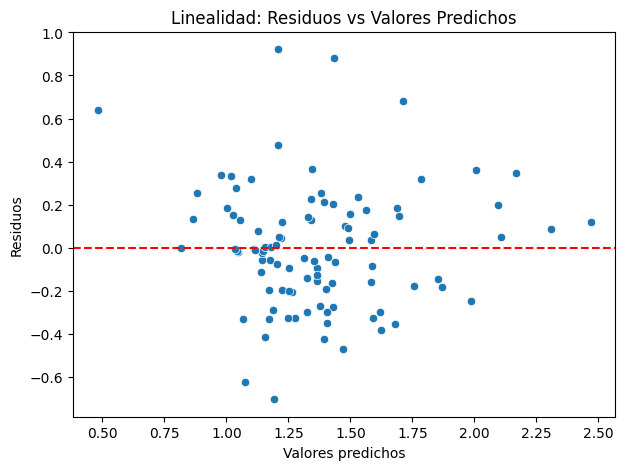

<Figure size 700x500 with 0 Axes>

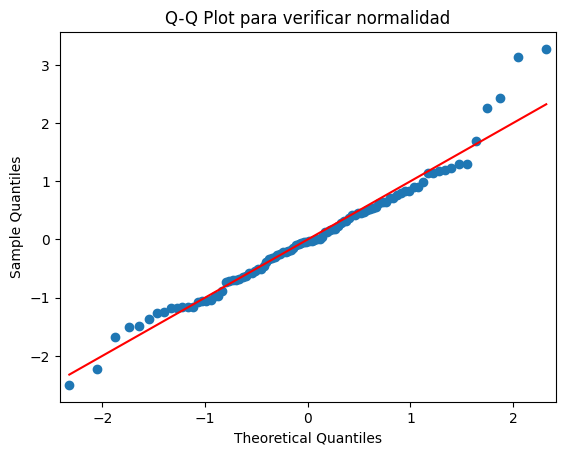

Prueba de Shapiro-Wilk: Estadístico=0.9722, p-valor=0.0358
Los residuos no parecen seguir una distribución normal.


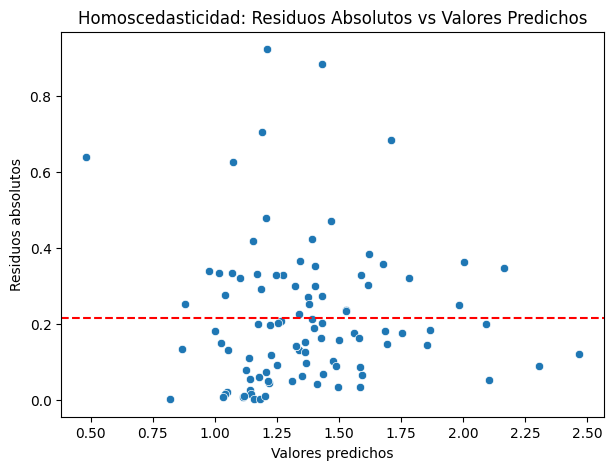

Prueba de Breusch-Pagan: p-valor=0.5113
No se rechaza la homoscedasticidad.
Prueba de Durbin-Watson: Estadístico=2.0578
No parece haber autocorrelación significativa en los residuos.


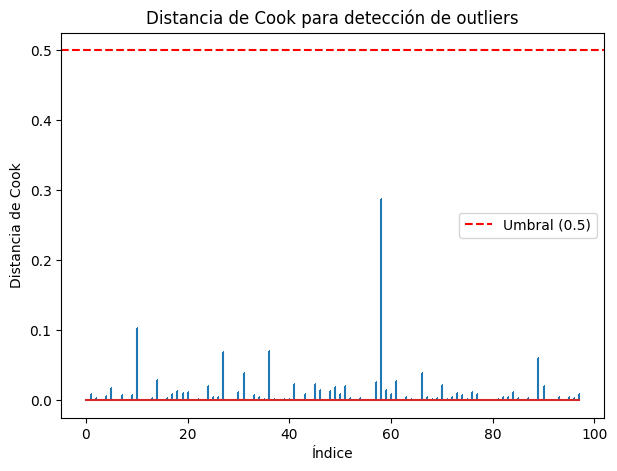

Observaciones con alta influencia (Cook's Distance > 0.5):
[]


In [59]:
verificar_supuestos(X, y, model)

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Crear el modelo de regresión
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Hacer predicciones
y_pred = modelo.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")

# Coeficientes de la regresión (qué tan importante es cada característica)
coeficientes = modelo.coef_
for col, coef in zip(columnss, coeficientes):
    print(f"{col}: {coef}")


Error cuadrático medio (MSE): 0.07182957749678323
Componente 1: 0.13714715618606413
Componente 2: 0.04607969662572681
Componente 3: -0.004919842391917558
Componente 4: 0.017854457506267428
Componente 5: 0.043815620719596333
Componente 6: 0.03114733181355485


In [61]:
puntos_predichos = modelo.predict(X)
prediccion_puntos = pd.DataFrame()
prediccion_puntos['Equipo'] = df['Equipo'].values
prediccion_puntos['Puntos_obtenidos'] = df['Puntos por partido'].values
prediccion_puntos['Puntos_predichos'] = puntos_predichos

In [62]:
import numpy as np
import plotly.express as px
import pandas as pd

# Crear la gráfica interactiva de dispersión
fig = px.scatter(
    prediccion_puntos,
    x='Puntos_obtenidos',
    y='Puntos_predichos',
    hover_name='Equipo',  # Muestra el nombre del equipo al seleccionar un punto
    title="Comparación de Puntos Predichos vs Puntos Obtenidos",
    labels={"Puntos obtenidos": "Puntos Obtenidos", "Puntos predichos": "Puntos Predichos"},
    color_discrete_sequence=["blue"]
)

# Línea de referencia y=x
max_val = max(prediccion_puntos['Puntos_obtenidos'].max(), prediccion_puntos['Puntos_predichos'].max())
fig.add_scatter(
    x=[0, max_val],
    y=[0, max_val],
    mode='lines',
    name='Línea Ideal (y=x)',
    line=dict(color='black', dash='dash'),  # Línea negra discontinua
)

fig.update_layout(
    xaxis_title="Puntos Obtenidos",
    yaxis_title="Puntos Predichos",
    template="plotly_white",  # Estilo de la gráfica
    height=600,
    width=800,
)

fig.show()


In [63]:
prediccion_puntos['Indice_Efectividad'] = prediccion_puntos['Puntos_obtenidos'] / prediccion_puntos['Puntos_predichos']
import plotly.express as px

fig = px.bar(
    prediccion_puntos.sort_values('Indice_Efectividad', ascending=False),
    x='Equipo',
    y='Indice_Efectividad',
    title='Índice de Cumplimiento de Expectativas',
    labels={'Indice_Efectividad': 'Índice de Efectividad'},
    color='Indice_Efectividad',
    color_continuous_scale='Viridis'
)
fig.update_layout(xaxis_title="Equipo", yaxis_title="Índice de Efectividad")
fig.show()

# Jugadores 

## Datos

Librerias

In [64]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 


Datos

In [116]:
dtpr = pd.read_excel(r".\DataPremier.xlsx", header=0)
dtpr.head()

,Rk,Nombre,Trans_Value,Season,Age,Nation,Pos,Team,Comp,MP,Min,90s,Starts,Subs,unSub,Gls,Ast,G+A,G-PK,PK,PKatt,PKm,Sh,G/Sh_S,G/SoT_S,SoT_S,SoT%_S,Dist_S,FK_S,Cmp_T,Att_T,Cmp%_T,KP_T,KP_1/3_T,PPA_T,CrsPA_T,PrgP_T,TotDist_T,PrgDist_T,Cmp_S,Att_S,Cmp%_S,Cmp_M,Att_M,Cmp%_M,Cmp_L,Att_L,Cmp%_L,SCA_S,PassLive_S,PassDead_S,TO_S,Sh_S,Fld_S,Def_S,GCA_G,PassLive_G,PassDead_G,TO_G,Sh_G,Fld_G,Def_G,Rec_R,PrgR_R,Carries_C,TotDist_C,PrgDist_C,Prg_C,C1/3_C,CPA_C,Mis_C,Dis_C,Tkl_T,TklW_T,Def_3rd_T,Mid_3rd_T,Att_3rd_T,Tkl_CH,Att_CH,Tkl%_CH,Lost_CH,Blocks_B,Sh_B,Pass_B,Int_B,Tkl+Int_B,Clr_B,Err_B,Won_A,Lost_A,Won%_A
0,1,Kurt Zouma,22.000000,2023-2024,28,fr FRA,DF,West Ham,eng Premier League,33,2838,31.500000,32,1,1,3,0,3,3,0,0,0,16,0.190000,0.430000,7,43.800000,9.100000,0,962,1148,83.800000,4,57,1,0,53,18843,6791,335,365,91.800000,509,558,91.200000,111,198,56.100000,13,11,0,0,1,1,0,2,2,0,0,0,0,0,873,1,794,3751,2019,7,5,1,13,3,23,17,14,9,0,10,16,62.500000,6,38,28,10,29,52,160,0,58,43,57.400000
1,2,Oleksandr Zinchenko,42.000000,2023-2024,26,ua UKR,DF,Arsenal,eng Premier League,27,1722,19.100000,20,7,5,1,2,3,1,0,0,0,17,0.060000,0.330000,3,17.600000,24.000000,0,1374,1568,87.600000,29,154,49,4,229,23132,6928,653,706,92.500000,601,667,90.100000,95,134,70.900000,67,64,1,1,1,0,0,6,5,1,0,0,0,0,1178,58,1013,4792,2334,40,28,7,10,15,50,30,19,24,7,35,52,67.300000,17,18,3,15,20,70,26,2,27,16,62.800000
2,3,Anass Zaroury,12.000000,2023-2024,22,ma MAR,"FW,MF",Burnley,eng Premier League,6,152,1.700000,1,5,7,0,0,0,0,0,0,0,3,0.000000,0.000000,1,33.300000,20.900000,0,43,70,61.400000,2,2,2,1,2,714,120,23,31,74.200000,13,21,61.900000,6,11,54.500000,2,1,1,0,0,0,0,0,0,0,0,0,0,0,68,12,60,362,91,2,2,0,3,2,1,0,1,0,0,0,4,0.000000,4,2,0,2,0,1,1,1,0,1,0.000000
3,4,Nicolò Zaniolo,25.000000,2023-2024,24,it ITA,"FW,MF",Aston Villa,eng Premier League,25,839,9.300000,9,16,5,2,0,2,2,0,0,0,27,0.070000,0.200000,10,37.000000,14.000000,0,150,228,65.800000,10,17,5,0,30,2141,550,94,119,79.000000,44,62,71.000000,6,15,40.000000,30,20,0,2,6,1,1,3,3,0,0,0,0,0,284,60,268,1854,915,35,16,15,31,36,19,9,10,7,2,9,17,52.900000,8,13,0,13,1,20,11,0,7,14,33.300000
4,5,Illia Zabarnyi,20.000000,2023-2024,20,ua UKR,DF,Bournemouth,eng Premier League,37,3330,37.000000,37,0,0,1,0,1,1,0,0,0,8,0.130000,0.500000,2,25.000000,7.500000,0,1471,1805,81.500000,7,127,11,0,109,30757,10546,392,458,85.600000,880,952,92.400000,188,362,51.900000,27,26,0,0,1,0,0,1,1,0,0,0,0,0,1368,1,1303,7280,4408,24,15,0,15,2,59,32,29,29,1,23,50,46.000000,27,53,34,19,33,92,143,4,75,60,55.600000


In [66]:
defe = dtpr[dtpr['Pos'].str.contains('DF', na=False)]
med = dtpr[dtpr['Pos'].str.contains('MF', na=False)]
dela = dtpr[dtpr['Pos'].str.contains('FW', na=False)]
gk = dtpr[dtpr['Pos'].str.contains('GK', na=False)]

In [67]:
def selected_players(dtpr, team_name):
    team_data = dtpr[dtpr['Team'] == team_name].copy()

    team_data['Primary_Pos'] = team_data['Pos'].apply(lambda x: x.split(',')[0])
    
    def select_count(position):
        return 1 if position == 'GK' else 4

    selected_players = team_data.groupby('Primary_Pos', group_keys=False).apply(
        lambda group: group.nlargest(select_count(group.name), 'Starts')
    ).reset_index(drop=True)
    
    return selected_players

def select_starting_eleven(data, team_name):
    selected = selected_players(data, team_name)  
    
    essential_positions = ['GK', 'DF', 'MF', 'FW']
    starting_eleven = pd.DataFrame()

    for position in essential_positions:
        player = selected[selected['Primary_Pos'] == position].head(1)
        starting_eleven = pd.concat([starting_eleven, player])

    remaining_players = selected[~selected['Rk'].isin(starting_eleven['Rk'])]
    additional_players = remaining_players.nlargest(11 - len(starting_eleven), 'Starts')

    starting_eleven = pd.concat([starting_eleven, additional_players]).head(11)

    return starting_eleven


In [68]:
def subs_players(dtpr, team_name):
    starting_eleven = select_starting_eleven(dtpr, team_name)
    
    team_data = dtpr[dtpr['Team'] == team_name]
    
    unselected_players = team_data[~team_data['Rk'].isin(starting_eleven['Rk'])]
    
    return unselected_players

In [69]:
starting_players_list = []
subs_players_list = []

teams = dtpr['Team'].unique()

for team in teams:
    starting_players = select_starting_eleven(dtpr, team)
    subs_players = dtpr[(dtpr['Team'] == team) & (~dtpr['Rk'].isin(starting_players['Rk']))]
    starting_players_list.append(starting_players)
    subs_players_list.append(subs_players)

starting_players_df = pd.concat(starting_players_list).reset_index(drop=True)
subs_players_df = dtpr[~dtpr['Rk'].isin(starting_players_df['Rk'])].reset_index(drop=True)


C:\Users\ENRIQUE\AppData\Local\Temp\ipykernel_5340\2520466010.py:9: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\ENRIQUE\AppData\Local\Temp\ipykernel_5340\2520466010.py:9: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\ENRIQUE\AppData\Local\Temp\ipykernel_5340\2520466010.py:9: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in 

In [70]:
pases = dtpr[['Rk'] + list(dtpr.loc[:, 'Cmp_T':'Cmp%_L'].columns)]
info = dtpr[['Rk'] + list(dtpr.loc[:, 'Nombre':'Comp'].columns)]
pl_tm = dtpr[['Rk'] + list(dtpr.loc[:, 'MP':'unSub'].columns)]
perf = dtpr[['Rk'] + list(dtpr.loc[:, 'Gls':'PKm'].columns)]
shots = dtpr[['Rk'] + list(dtpr.loc[:, 'Sh':'FK_S'].columns)]
sca = dtpr[['Rk'] + list(dtpr.loc[:, 'SCA_S':'Def_S'].columns)]
gca = dtpr[['Rk'] + list(dtpr.loc[:, 'GCA_G':'Def_G'].columns)]
recep = dtpr[['Rk'] + list(dtpr.loc[:, 'Rec_R':'PrgR_R'].columns)]
carries = dtpr[['Rk'] + list(dtpr.loc[:, 'Carries_C':'Dis_C'].columns)]
defensivo = dtpr[['Rk'] + list(dtpr.loc[:, 'Tkl_CH':'Lost_CH'].columns)]
blocks = dtpr[['Rk'] + list(dtpr.loc[:, 'Blocks_B':'Err_B'].columns)]
aer = dtpr[['Rk'] + list(dtpr.loc[:, 'Won_A':'Won%_A'].columns)]

Agrupamiento

In [71]:
pases_tit = pd.merge(starting_players_df, pases, how='inner')
pases_tit.head()

,Rk,Nombre,Trans_Value,Season,Age,Nation,Pos,Team,Comp,MP,Min,90s,Starts,Subs,unSub,Gls,Ast,G+A,G-PK,PK,PKatt,PKm,Sh,G/Sh_S,G/SoT_S,SoT_S,SoT%_S,Dist_S,FK_S,Cmp_T,Att_T,Cmp%_T,KP_T,KP_1/3_T,PPA_T,CrsPA_T,PrgP_T,TotDist_T,PrgDist_T,Cmp_S,Att_S,Cmp%_S,Cmp_M,Att_M,Cmp%_M,Cmp_L,Att_L,Cmp%_L,SCA_S,PassLive_S,PassDead_S,TO_S,Sh_S,Fld_S,Def_S,GCA_G,PassLive_G,PassDead_G,TO_G,Sh_G,Fld_G,Def_G,Rec_R,PrgR_R,Carries_C,TotDist_C,PrgDist_C,Prg_C,C1/3_C,CPA_C,Mis_C,Dis_C,Tkl_T,TklW_T,Def_3rd_T,Mid_3rd_T,Att_3rd_T,Tkl_CH,Att_CH,Tkl%_CH,Lost_CH,Blocks_B,Sh_B,Pass_B,Int_B,Tkl+Int_B,Clr_B,Err_B,Won_A,Lost_A,Won%_A,Primary_Pos
0,540,Alphonse Areola,8.000000,2023-2024,30,fr FRA,GK,West Ham,eng Premier League,31,2699,30.000000,31,0,2,0,0,0,0,0,0,0,0,NaN,NaN,0,NaN,NaN,0,562,867,64.800000,0,8,0,0,1,17799,12917,74,76,97.400000,245,246,99.600000,241,538,44.800000,2,1,1,0,0,0,0,0,0,0,0,0,0,0,345,0,498,3168,1945,0,1,0,0,0,1,1,1,0,0,1,3,33.300000,2,0,0,0,1,2,16,0,10,1,90.900000,GK
1,457,Vladimír Coufal,9.000000,2023-2024,30,cz CZE,DF,West Ham,eng Premier League,36,3132,34.800000,36,0,0,0,7,7,0,0,0,0,8,0.000000,0.000000,2,25.000000,22.600000,0,1154,1665,69.300000,33,98,38,21,119,18778,9229,596,669,89.100000,448,627,71.500000,84,254,33.100000,77,50,18,3,2,3,1,12,12,0,0,0,0,0,1010,126,885,4956,2431,68,35,4,28,13,64,41,50,12,2,38,75,50.700000,37,49,15,34,43,107,97,0,40,37,51.900000,DF
2,28,James Ward-Prowse,38.000000,2023-2024,28,eng ENG,MF,West Ham,eng Premier League,37,3001,33.300000,34,3,0,7,7,14,5,2,2,0,42,0.120000,0.310000,16,38.100000,22.800000,16,1386,1672,82.900000,64,137,23,8,144,23288,7105,702,762,92.100000,520,570,91.200000,134,270,49.600000,116,57,51,1,4,1,2,16,7,7,0,2,0,0,1155,63,911,3951,1606,18,26,6,15,11,45,29,14,23,8,18,44,40.900000,26,31,9,22,38,83,49,0,26,33,44.100000,MF
3,503,Jarrod Bowen,38.000000,2023-2024,26,eng ENG,FW,West Ham,eng Premier League,34,3019,33.500000,34,0,0,16,6,22,16,0,0,0,84,0.190000,0.430000,37,44.000000,14.200000,0,484,702,68.900000,31,29,13,3,52,6899,1825,284,341,83.300000,141,188,75.000000,34,71,47.900000,81,55,7,6,5,6,2,12,9,1,0,1,0,1,745,186,666,4859,2141,90,40,49,79,58,42,28,14,14,14,13,35,37.100000,22,37,5,32,19,61,14,0,33,70,32.000000,FW
4,162,Emerson Palmieri,12.000000,2023-2024,28,it ITA,DF,West Ham,eng Premier League,36,3137,34.900000,35,1,0,1,2,3,1,0,0,0,19,0.050000,0.250000,4,21.100000,17.300000,0,1421,1745,81.400000,25,89,22,7,125,19356,7676,893,983,90.800000,406,510,79.600000,54,104,51.900000,74,49,6,3,4,8,4,12,6,2,1,1,1,1,1242,124,1057,5492,2790,59,47,9,36,17,106,68,48,42,16,57,90,63.300000,33,47,15,32,43,149,96,0,25,23,52.100000,DF


In [72]:
from sklearn.preprocessing import normalize
pases_tit_n = pd.merge(starting_players_df, pases, how='inner')
pases_tit = pases_tit.loc[:, 'Cmp_T':'Cmp%_L']  
pases_tit = pases_tit.fillna(0)
pases_norm = pases_tit
pases_sc = normalize(pases_norm)
pases_sc = pd.DataFrame(pases_sc, columns = pases_tit.loc[:, 'Cmp_T':'Cmp%_L'].columns)
pases_sc.head()

,Cmp_T,Att_T,Cmp%_T,KP_T,KP_1/3_T,PPA_T,CrsPA_T,PrgP_T,TotDist_T,PrgDist_T,Cmp_S,Att_S,Cmp%_S,Cmp_M,Att_M,Cmp%_M,Cmp_L,Att_L,Cmp%_L
0,0.025513,0.039359,0.002942,0.000000,0.000363,0.000000,0.000000,0.000045,0.808023,0.586394,0.003359,0.003450,0.004422,0.011122,0.011168,0.004522,0.010941,0.024424,0.002034
1,0.054803,0.079070,0.003291,0.001567,0.004654,0.001805,0.000997,0.005651,0.891762,0.438282,0.028304,0.031771,0.004231,0.021275,0.029776,0.003396,0.003989,0.012062,0.001572
2,0.056613,0.068296,0.003386,0.002614,0.005596,0.000939,0.000327,0.005882,0.951237,0.290216,0.028674,0.031125,0.003762,0.021240,0.023283,0.003725,0.005473,0.011029,0.002026
3,0.067160,0.097409,0.009561,0.004302,0.004024,0.001804,0.000416,0.007216,0.957304,0.253237,0.039408,0.047317,0.011559,0.019565,0.026087,0.010407,0.004718,0.009852,0.006647
4,0.067675,0.083106,0.003877,0.001191,0.004239,0.001048,0.000333,0.005953,0.921828,0.365569,0.042529,0.046815,0.004324,0.019336,0.024289,0.003791,0.002572,0.004953,0.002472


## Regresiones

### Prediccion de asistencias

Limpieza de dataframe

In [73]:
starting_midfielders = starting_players_df[starting_players_df['Pos'].str.contains('MF', na=False)]
sub_midfielders = subs_players_df[subs_players_df['Pos'].str.contains('MF', na=False)]
midfielders = pd.concat([starting_midfielders, sub_midfielders]).reset_index(drop=True)
midfielders = midfielders[['Nombre', 'Team', 'Ast', 'Min', 'GCA_G', 'KP_T']]
midfielders = midfielders.fillna(0)
midfielders.sort_values(by='Ast', ascending=False).head(15)

,Nombre,Team,Ast,Min,GCA_G,KP_T
71,Cole Palmer,Chelsea,11,2618,26,72
29,Morgan Gibbs-White,Nott'ham Forest,10,3156,18,74
6,Martin Ødegaard,Arsenal,10,3091,23,102
64,Pascal Groß,Brighton,10,3114,16,103
209,Kevin De Bruyne,Manchester City,10,1221,16,59
62,James Maddison,Tottenham,9,2135,19,67
74,Rodri,Manchester City,9,2931,23,49
94,Pedro Neto,Wolves,9,1516,14,38
76,Bernardo Silva,Manchester City,9,2578,13,64
30,Anthony Elanga,Nott'ham Forest,9,2433,13,32


Exploracion de datos

In [74]:
fig = px.scatter_3d(midfielders, x='Min', y='GCA_G', z='KP_T', color='Ast', size='Ast', opacity=0.7)
fig.show()

Regresion

In [75]:
X_mf = midfielders[['Min', 'GCA_G', 'KP_T']]
y_mf = midfielders['Ast']

X_train_mf, X_test_mf, y_train_mf, y_test_mf = train_test_split(X_mf, y_mf, test_size=0.2, random_state=42)
X_train_mf.shape, X_test_mf.shape, y_train_mf.shape, y_test_mf.shape

((202, 3), (51, 3), (202,), (51,))

In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr_model_mf = LinearRegression()
lr_model_mf.fit(X_train_mf, y_train_mf)

y_pred_mf = lr_model_mf.predict(X_test_mf)

print('Mean Squared Error:', mean_squared_error(y_test_mf, y_pred_mf))
print('Mean Absolute Error:', mean_absolute_error(y_test_mf, y_pred_mf))
print('R2 Score:', r2_score(y_test_mf, y_pred_mf))

Mean Squared Error: 1.3586990668671999
Mean Absolute Error: 0.7357905131717549
R2 Score: 0.8092835254764389


In [77]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [78]:
lasso_model_mf = Lasso(alpha=0.5)
lasso_model_mf.fit(X_train_mf, y_train_mf)

y_pred_lasso_mf = lasso_model_mf.predict(X_test_mf)

print('Mean Squared Error:', mean_squared_error(y_test_mf, y_pred_lasso_mf))
print('Mean Absolute Error:', mean_absolute_error(y_test_mf, y_pred_lasso_mf))
print('R2 Score:', r2_score(y_test_mf, y_pred_lasso_mf))

Mean Squared Error: 1.3426584187044421
Mean Absolute Error: 0.7215828925139378
R2 Score: 0.811535102695615


In [79]:
ridge_model_mf = Ridge(alpha=0.5)
ridge_model_mf.fit(X_train_mf, y_train_mf)

y_pred_ridge_mf = ridge_model_mf.predict(X_test_mf)

print('Mean Squared Error:', mean_squared_error(y_test_mf, y_pred_ridge_mf))
print('Mean Absolute Error:', mean_absolute_error(y_test_mf, y_pred_ridge_mf))
print('R2 Score:', r2_score(y_test_mf, y_pred_ridge_mf))

Mean Squared Error: 1.3586508609655035
Mean Absolute Error: 0.7357512928527461
R2 Score: 0.8092902919929155


In [80]:
el_model_mf = ElasticNet(alpha=0.5, l1_ratio=0.5)
el_model_mf.fit(X_train_mf, y_train_mf)
y_pred_el_mf = el_model_mf.predict(X_test_mf)

print('Mean Squared Error:', mean_squared_error(y_test_mf, y_pred_el_mf))
print('Mean Absolute Error:', mean_absolute_error(y_test_mf, y_pred_el_mf))
print('R2 Score:', r2_score(y_test_mf, y_pred_el_mf))

Mean Squared Error: 1.3457519492085273
Mean Absolute Error: 0.7246102404687585
R2 Score: 0.8111008731844911


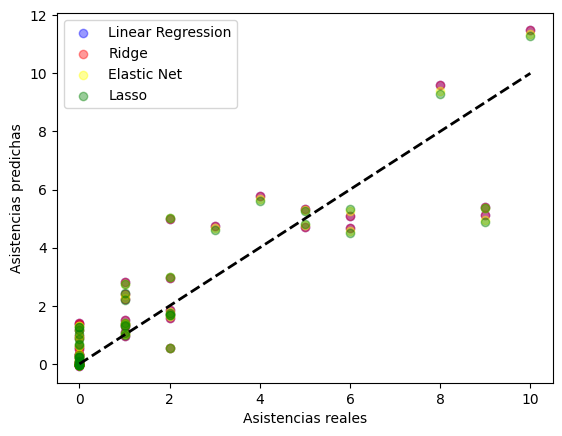

In [81]:
plt.scatter(y_test_mf, y_pred_mf, color='blue', label='Linear Regression', alpha=0.4)
plt.scatter(y_test_mf, y_pred_ridge_mf, color='red', label='Ridge', alpha=0.4)
plt.scatter(y_test_mf, y_pred_el_mf, color='yellow', label='Elastic Net', alpha=0.4)
plt.scatter(y_test_mf, y_pred_lasso_mf, color='green', label='Lasso', alpha=0.4)
plt.plot([0, max(y_test_mf)], [0, max(y_test_mf)], 'k--', lw=2)
plt.xlabel('Asistencias reales')
plt.ylabel('Asistencias predichas')
plt.legend()
plt.show()

In [82]:
midfielders['Predicted_Ast'] = lasso_model_mf.predict(X_mf)
midfielder_predictions = midfielders[['Nombre', 'Team', 'Ast', 'Predicted_Ast']]
midfielder_predictions = midfielder_predictions.sort_values(by='Predicted_Ast', ascending=False)

In [83]:
midfielder_predictions.head(25)

,Nombre,Team,Ast,Predicted_Ast
6,Martin Ødegaard,Arsenal,10,11.268334
71,Cole Palmer,Chelsea,11,10.869213
49,Bruno Fernandes,Manchester Utd,8,10.601249
75,Phil Foden,Manchester City,8,9.282529
64,Pascal Groß,Brighton,10,9.121383
74,Rodri,Manchester City,9,8.701443
62,James Maddison,Tottenham,9,8.579076
7,Kai Havertz,Arsenal,7,8.330380
29,Morgan Gibbs-White,Nott'ham Forest,10,8.303245
43,Andreas Pereira,Fulham,7,8.022451


## Agglomerative Cluster

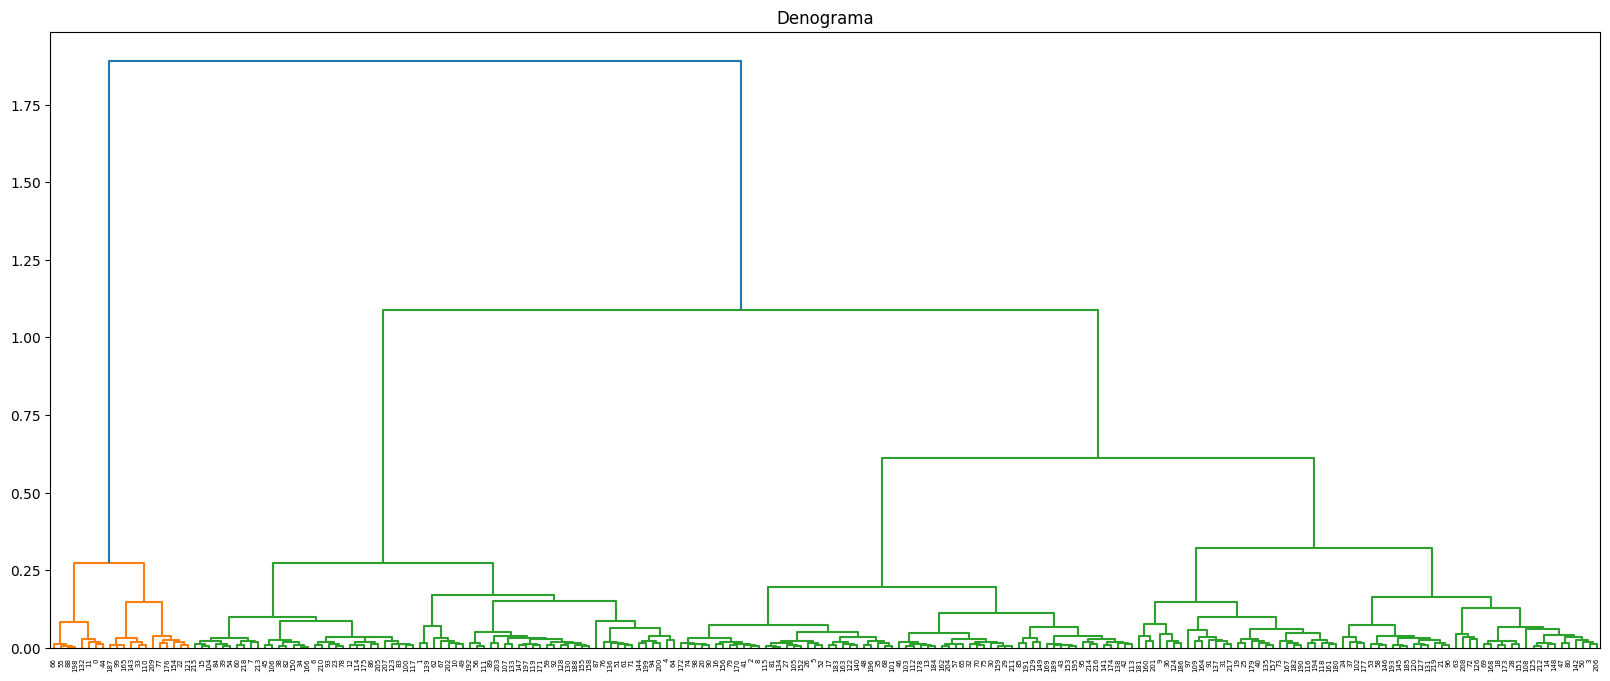

In [84]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,8))
plt.title('Denograma')
dend = sch.dendrogram(sch.linkage(pases_sc, method='ward'))

In [85]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3,metric='euclidean', linkage='ward') #linkage tiene que ser el mismo que el del endograma
y_hat = ac.fit_predict(pases_sc)

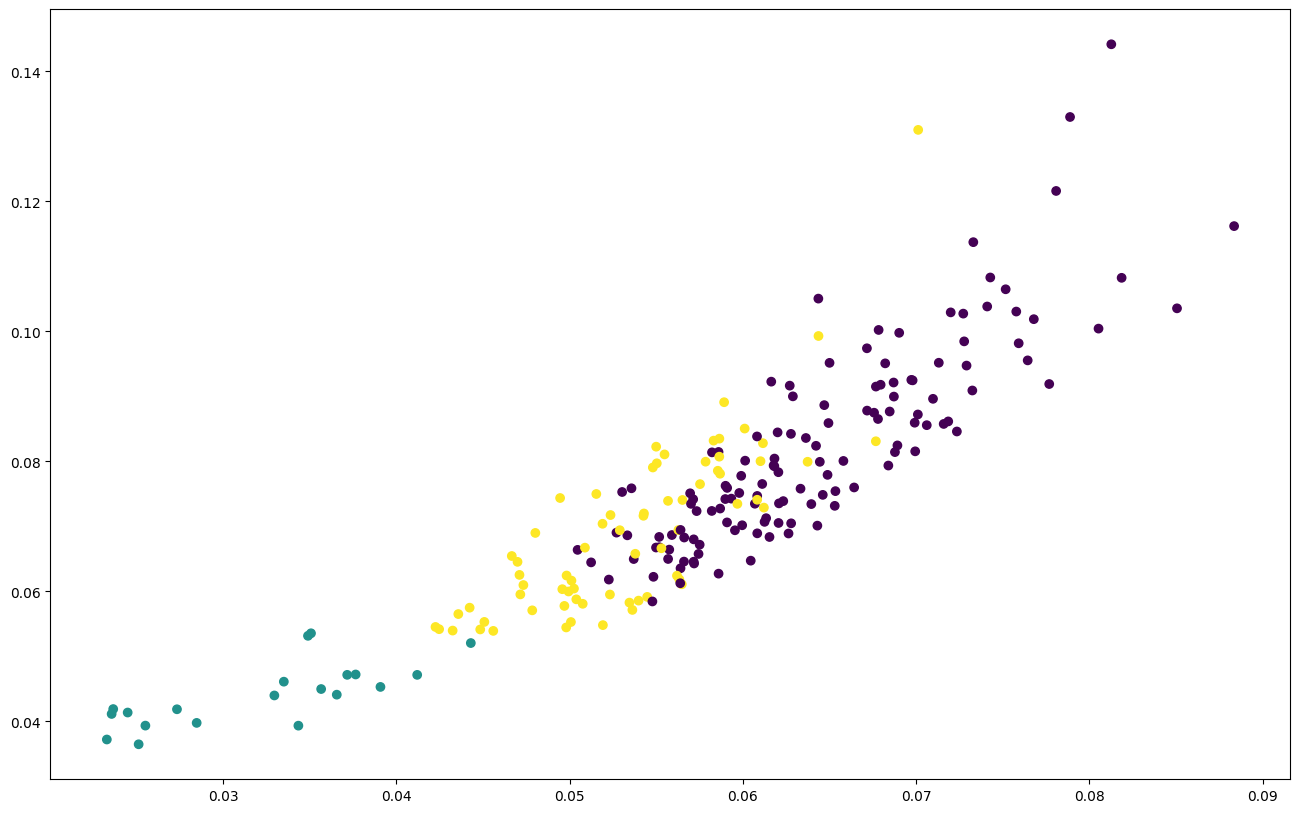

In [86]:
plt.figure(figsize=(16, 10))
plt.scatter(pases_sc['Cmp_T'], pases_sc['Att_T'], c = y_hat)
plt.show()

In [87]:
pases_sc['Nombre'] = pases_tit_n['Nombre']
pases_sc

,Cmp_T,Att_T,Cmp%_T,KP_T,KP_1/3_T,PPA_T,CrsPA_T,PrgP_T,TotDist_T,PrgDist_T,Cmp_S,Att_S,Cmp%_S,Cmp_M,Att_M,Cmp%_M,Cmp_L,Att_L,Cmp%_L,Nombre
0,0.025513,0.039359,0.002942,0.000000,0.000363,0.000000,0.000000,0.000045,0.808023,0.586394,0.003359,0.003450,0.004422,0.011122,0.011168,0.004522,0.010941,0.024424,0.002034,Alphonse Areola
1,0.054803,0.079070,0.003291,0.001567,0.004654,0.001805,0.000997,0.005651,0.891762,0.438282,0.028304,0.031771,0.004231,0.021275,0.029776,0.003396,0.003989,0.012062,0.001572,Vladimír Coufal
2,0.056613,0.068296,0.003386,0.002614,0.005596,0.000939,0.000327,0.005882,0.951237,0.290216,0.028674,0.031125,0.003762,0.021240,0.023283,0.003725,0.005473,0.011029,0.002026,James Ward-Prowse
3,0.067160,0.097409,0.009561,0.004302,0.004024,0.001804,0.000416,0.007216,0.957304,0.253237,0.039408,0.047317,0.011559,0.019565,0.026087,0.010407,0.004718,0.009852,0.006647,Jarrod Bowen
4,0.067675,0.083106,0.003877,0.001191,0.004239,0.001048,0.000333,0.005953,0.921828,0.365569,0.042529,0.046815,0.004324,0.019336,0.024289,0.003791,0.002572,0.004953,0.002472,Emerson Palmieri
5,0.060131,0.080119,0.006255,0.001666,0.006663,0.000666,0.000167,0.007162,0.946773,0.299323,0.030315,0.037478,0.006738,0.022653,0.028816,0.006546,0.004497,0.007162,0.005230,Tomáš Souček
6,0.047842,0.057093,0.004168,0.000199,0.002835,0.000050,0.000000,0.002636,0.937103,0.337731,0.016660,0.018152,0.004565,0.025314,0.027751,0.004536,0.005520,0.009847,0.002790,Kurt Zouma
7,0.061158,0.082807,0.004177,0.002430,0.008083,0.002826,0.000452,0.010570,0.936082,0.330209,0.033801,0.040358,0.004737,0.018879,0.024588,0.004341,0.005370,0.009779,0.003103,Lucas Paquetá
8,0.057506,0.067193,0.004765,0.000668,0.004843,0.000334,0.000056,0.005066,0.950998,0.290872,0.028837,0.031898,0.005033,0.022323,0.024773,0.005016,0.004843,0.007348,0.003669,Edson Álvarez
9,0.059000,0.076256,0.006745,0.002440,0.002789,0.002527,0.001394,0.006972,0.981564,0.153732,0.031112,0.035296,0.007678,0.020132,0.024489,0.007164,0.006100,0.009412,0.005647,Mohammed Kudus


In [88]:
import plotly.graph_objects as go


fig = go.Figure()

fig.add_trace(go.Scatter(
    x=pases_sc['Cmp_T'],
    y=pases_sc['Att_T'],
    mode='markers',  
    marker=dict(color=y_hat),  
    text=pases_sc['Nombre'],  
    hovertemplate=(
        '<b>Nombre:</b> %{text}<br>' +
        '<b>Pases Completos:</b> %{x}<br>' +
        '<b>Pases Intentados:</b> %{y}<br>' +
        '<extra></extra>'
    )
))

fig.update_layout(
    title='Pases Completos v.s Pases Intentados (Categorías)',
    xaxis_title='Cmp_T (Pases Completos)',
    yaxis_title='Att_T (Pases Intentados)',
    width=800,
    height=600
)

fig.show()


## K_medias 

In [89]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes

In [90]:
pases_sc = pases_sc.drop(pases_sc.columns[-1], axis=1)
pases_sc

,Cmp_T,Att_T,Cmp%_T,KP_T,KP_1/3_T,PPA_T,CrsPA_T,PrgP_T,TotDist_T,PrgDist_T,Cmp_S,Att_S,Cmp%_S,Cmp_M,Att_M,Cmp%_M,Cmp_L,Att_L,Cmp%_L
0,0.025513,0.039359,0.002942,0.000000,0.000363,0.000000,0.000000,0.000045,0.808023,0.586394,0.003359,0.003450,0.004422,0.011122,0.011168,0.004522,0.010941,0.024424,0.002034
1,0.054803,0.079070,0.003291,0.001567,0.004654,0.001805,0.000997,0.005651,0.891762,0.438282,0.028304,0.031771,0.004231,0.021275,0.029776,0.003396,0.003989,0.012062,0.001572
2,0.056613,0.068296,0.003386,0.002614,0.005596,0.000939,0.000327,0.005882,0.951237,0.290216,0.028674,0.031125,0.003762,0.021240,0.023283,0.003725,0.005473,0.011029,0.002026
3,0.067160,0.097409,0.009561,0.004302,0.004024,0.001804,0.000416,0.007216,0.957304,0.253237,0.039408,0.047317,0.011559,0.019565,0.026087,0.010407,0.004718,0.009852,0.006647
4,0.067675,0.083106,0.003877,0.001191,0.004239,0.001048,0.000333,0.005953,0.921828,0.365569,0.042529,0.046815,0.004324,0.019336,0.024289,0.003791,0.002572,0.004953,0.002472
5,0.060131,0.080119,0.006255,0.001666,0.006663,0.000666,0.000167,0.007162,0.946773,0.299323,0.030315,0.037478,0.006738,0.022653,0.028816,0.006546,0.004497,0.007162,0.005230
6,0.047842,0.057093,0.004168,0.000199,0.002835,0.000050,0.000000,0.002636,0.937103,0.337731,0.016660,0.018152,0.004565,0.025314,0.027751,0.004536,0.005520,0.009847,0.002790
7,0.061158,0.082807,0.004177,0.002430,0.008083,0.002826,0.000452,0.010570,0.936082,0.330209,0.033801,0.040358,0.004737,0.018879,0.024588,0.004341,0.005370,0.009779,0.003103
8,0.057506,0.067193,0.004765,0.000668,0.004843,0.000334,0.000056,0.005066,0.950998,0.290872,0.028837,0.031898,0.005033,0.022323,0.024773,0.005016,0.004843,0.007348,0.003669
9,0.059000,0.076256,0.006745,0.002440,0.002789,0.002527,0.001394,0.006972,0.981564,0.153732,0.031112,0.035296,0.007678,0.020132,0.024489,0.007164,0.006100,0.009412,0.005647


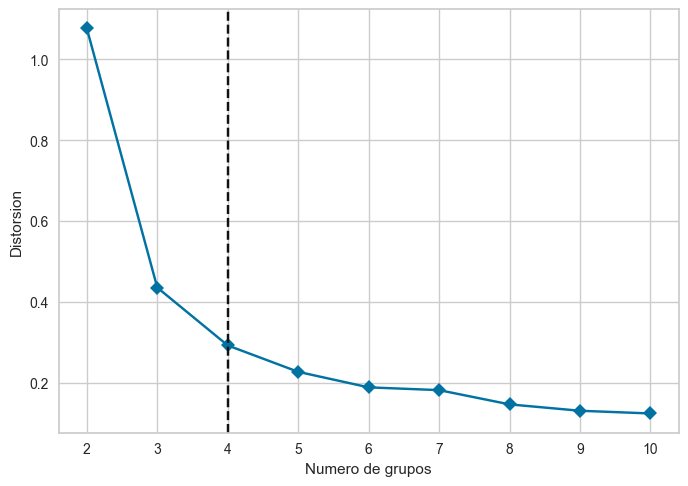

In [91]:
X = pases_sc
#Grafica
vis = KElbowVisualizer(KMeans(n_init='auto'), timings=False)
vis.fit(X)
plt.xlabel('Numero de grupos')
plt.ylabel('Distorsion')
plt.show()

In [92]:
kmeans = KMeans(n_clusters=4)
kmeams = kmeans.fit(pases_sc)
y_kmeans = kmeans.predict(pases_sc)

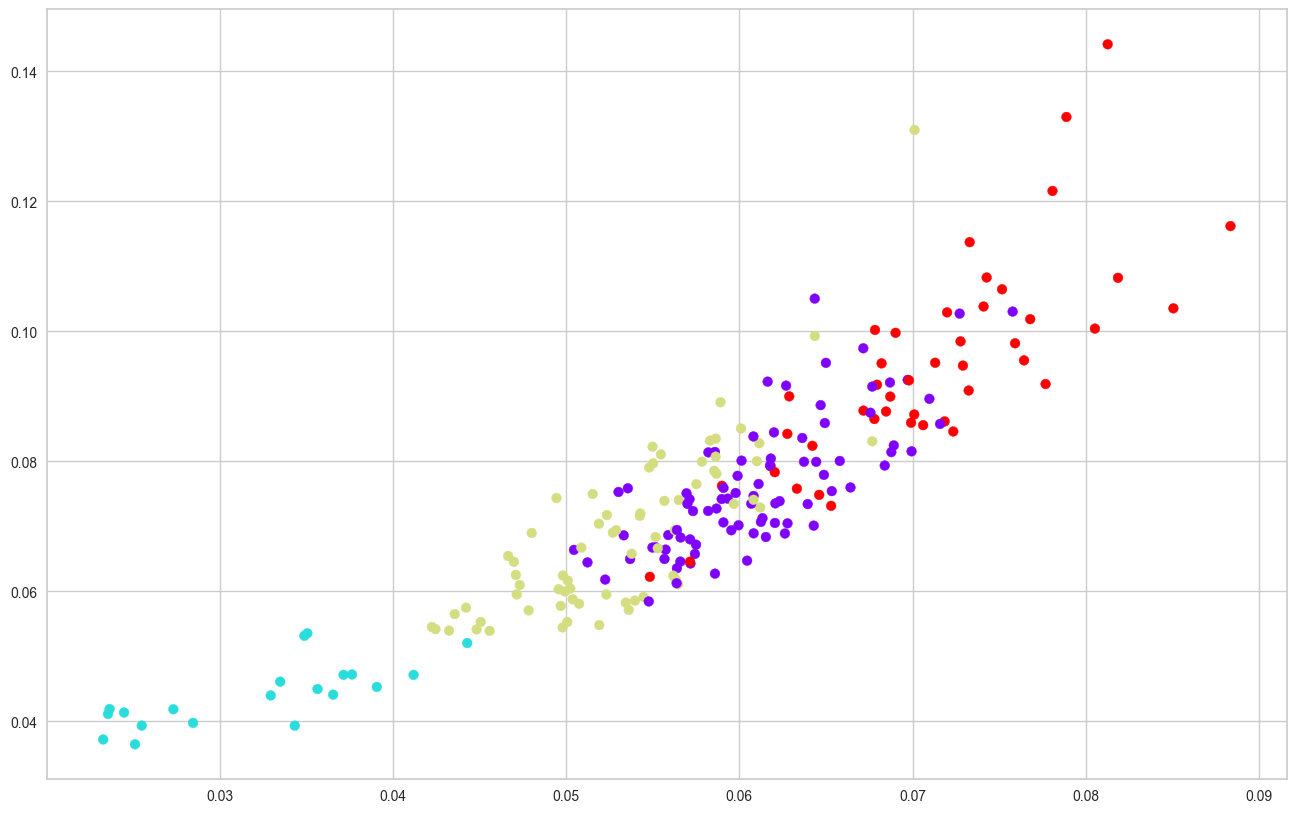

In [93]:
plt.figure(figsize=(16, 10))
plt.scatter(pases_sc['Cmp_T'], pases_sc['Att_T'], c = y_kmeans, cmap='rainbow')
plt.show()

In [94]:
pases_sc['Nombre'] = pases_tit_n['Nombre']
pases_sc

,Cmp_T,Att_T,Cmp%_T,KP_T,KP_1/3_T,PPA_T,CrsPA_T,PrgP_T,TotDist_T,PrgDist_T,Cmp_S,Att_S,Cmp%_S,Cmp_M,Att_M,Cmp%_M,Cmp_L,Att_L,Cmp%_L,Nombre
0,0.025513,0.039359,0.002942,0.000000,0.000363,0.000000,0.000000,0.000045,0.808023,0.586394,0.003359,0.003450,0.004422,0.011122,0.011168,0.004522,0.010941,0.024424,0.002034,Alphonse Areola
1,0.054803,0.079070,0.003291,0.001567,0.004654,0.001805,0.000997,0.005651,0.891762,0.438282,0.028304,0.031771,0.004231,0.021275,0.029776,0.003396,0.003989,0.012062,0.001572,Vladimír Coufal
2,0.056613,0.068296,0.003386,0.002614,0.005596,0.000939,0.000327,0.005882,0.951237,0.290216,0.028674,0.031125,0.003762,0.021240,0.023283,0.003725,0.005473,0.011029,0.002026,James Ward-Prowse
3,0.067160,0.097409,0.009561,0.004302,0.004024,0.001804,0.000416,0.007216,0.957304,0.253237,0.039408,0.047317,0.011559,0.019565,0.026087,0.010407,0.004718,0.009852,0.006647,Jarrod Bowen
4,0.067675,0.083106,0.003877,0.001191,0.004239,0.001048,0.000333,0.005953,0.921828,0.365569,0.042529,0.046815,0.004324,0.019336,0.024289,0.003791,0.002572,0.004953,0.002472,Emerson Palmieri
5,0.060131,0.080119,0.006255,0.001666,0.006663,0.000666,0.000167,0.007162,0.946773,0.299323,0.030315,0.037478,0.006738,0.022653,0.028816,0.006546,0.004497,0.007162,0.005230,Tomáš Souček
6,0.047842,0.057093,0.004168,0.000199,0.002835,0.000050,0.000000,0.002636,0.937103,0.337731,0.016660,0.018152,0.004565,0.025314,0.027751,0.004536,0.005520,0.009847,0.002790,Kurt Zouma
7,0.061158,0.082807,0.004177,0.002430,0.008083,0.002826,0.000452,0.010570,0.936082,0.330209,0.033801,0.040358,0.004737,0.018879,0.024588,0.004341,0.005370,0.009779,0.003103,Lucas Paquetá
8,0.057506,0.067193,0.004765,0.000668,0.004843,0.000334,0.000056,0.005066,0.950998,0.290872,0.028837,0.031898,0.005033,0.022323,0.024773,0.005016,0.004843,0.007348,0.003669,Edson Álvarez
9,0.059000,0.076256,0.006745,0.002440,0.002789,0.002527,0.001394,0.006972,0.981564,0.153732,0.031112,0.035296,0.007678,0.020132,0.024489,0.007164,0.006100,0.009412,0.005647,Mohammed Kudus


In [95]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=pases_sc['Cmp_T'],
    y=pases_sc['Att_T'],
    mode='markers',  
    marker=dict(color=y_kmeans),  
    text=pases_sc['Nombre'],  
    hovertemplate=(
        '<b>Nombre:</b> %{text}<br>' +
        '<b>Pases Completos:</b> %{x}<br>' +
        '<b>Pases Intentados:</b> %{y}<br>' +
        '<extra></extra>'
    )
))

fig.update_layout(
    title='Pases Completos v.s Pases Intentados (Categorías)',
    xaxis_title='Cmp_T (Pases Completos)',
    yaxis_title='Att_T (Pases Intentados)',
    width=800,
    height=600
)

fig.show()

## Prediccion de goles

In [96]:
starting_strikers = starting_players_df[starting_players_df['Pos'].str.contains('FW', na=False)]
sub_strikers = subs_players_df[subs_players_df['Pos'].str.contains('FW', na=False)]
strikers = pd.concat([starting_strikers, sub_strikers]).reset_index(drop=True)
strikers = strikers[['Nombre', 'Team', 'Min', 'Gls', 'Sh', 'G/Sh_S']]
strikers = strikers.fillna(0)
strikers.sort_values(by='Gls', ascending=False).head(15)

,Nombre,Team,Min,Gls,Sh,G/Sh_S
60,Erling Haaland,Manchester City,2552,27,113,0.180000
56,Cole Palmer,Chelsea,2618,22,100,0.130000
36,Alexander Isak,Newcastle Utd,2255,21,72,0.220000
14,Dominic Solanke,Bournemouth,3325,19,106,0.160000
11,Ollie Watkins,Aston Villa,3217,19,107,0.180000
58,Phil Foden,Manchester City,2857,19,105,0.180000
64,Mohamed Salah,Liverpool,2534,18,107,0.120000
48,Son Heung-min,Tottenham,2934,17,83,0.180000
45,Jean-Philippe Mateta,Crystal Palace,2282,16,44,0.320000
3,Bukayo Saka,Arsenal,2919,16,102,0.100000


In [97]:
import plotly.express as px
fig = px.scatter_3d(strikers, x='Min', y='Sh', z='G/Sh_S', color='Gls', size='Gls', opacity=0.7)
fig.show()

In [98]:
from sklearn.model_selection import train_test_split

X_fw = strikers[['Min', 'Sh', 'G/Sh_S']]
y_fw = strikers['Gls']

X_train_fw, X_test_fw, y_train_fw, y_test_fw = train_test_split(X_fw, y_fw, test_size=0.2, random_state=42)
X_train_fw.shape, X_test_fw.shape, y_train_fw.shape, y_test_fw.shape

((170, 3), (43, 3), (170,), (43,))

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

poly_fw = PolynomialFeatures(degree=2)

X_train_poly_fw = poly_fw.fit_transform(X_train_fw)
X_test_poly_fw = poly_fw.transform(X_test_fw)

lr_model_poly_fw = LinearRegression()
lr_model_poly_fw.fit(X_train_poly_fw, y_train_fw)

y_pred_poly_fw = lr_model_poly_fw.predict(X_test_poly_fw)

print('Mean Squared Error:', mean_squared_error(y_test_fw, y_pred_poly_fw))
print('Mean Absolute Error:', mean_absolute_error(y_test_fw, y_pred_poly_fw))
print('R2 Score:', r2_score(y_test_fw, y_pred_poly_fw))

Mean Squared Error: 0.7501803130745713
Mean Absolute Error: 0.46421583365625346
R2 Score: 0.9738572241909819


In [100]:
print(lr_model_poly_fw.coef_)

[ 0.00000000e+00  6.16110843e-04 -1.43790594e-02  1.04357514e+00
 -2.82265749e-07  1.77116228e-05 -3.03263233e-03 -6.65991720e-06
  1.03926583e+00 -7.76586125e-01]


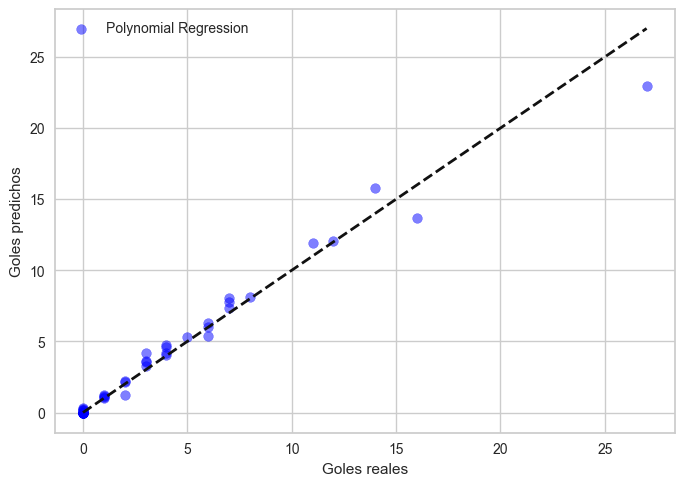

In [101]:
plt.scatter(y_test_fw, y_pred_poly_fw, color='blue', label='Polynomial Regression', alpha=0.5)
plt.plot([0, max(y_test_fw)], [0, max(y_test_fw)], 'k--', lw=2)
plt.xlabel('Goles reales')
plt.ylabel('Goles predichos')
plt.legend()
plt.show()

In [102]:
X_poly_fw = poly_fw.transform(X_fw)
strikers['Predicted_Gls'] = lr_model_poly_fw.predict(X_poly_fw)
striker_predictions = strikers[['Nombre', 'Team', 'Gls', 'Predicted_Gls']]
strikers_predictions = striker_predictions.sort_values(by='Predicted_Gls', ascending=False)

In [103]:
strikers_predictions.head(25)

,Nombre,Team,Gls,Predicted_Gls
60,Erling Haaland,Manchester City,27,22.972305
11,Ollie Watkins,Aston Villa,19,21.897861
58,Phil Foden,Manchester City,19,21.363780
14,Dominic Solanke,Bournemouth,19,19.663366
0,Jarrod Bowen,West Ham,16,17.473801
36,Alexander Isak,Newcastle Utd,21,16.841617
48,Son Heung-min,Tottenham,17,16.471665
55,Nicolas Jackson,Chelsea,14,15.818651
64,Mohamed Salah,Liverpool,18,15.404586
56,Cole Palmer,Chelsea,22,15.343910


### Pred_bayesiana 

In [104]:
dela_tit_n = starting_players_df[starting_players_df['Primary_Pos'].str.contains('FW', na=False)] 
dela_tit = dela_tit_n[['Rk'] + list(dela_tit_n.loc[:, 'Sh':'FK_S'].columns) + ['Gls']]
dela_tit = dela_tit.fillna(0)

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

X_by = dela_tit.drop(columns=['Rk', 'Gls'])
y_by = dela_tit['Gls'] 

X_train_by, X_test_by, y_train_by, y_test_by = train_test_split(X_by, y_by, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled_by = scaler.fit_transform(X_train_by)
X_test_scaled_by = scaler.transform(X_test_by)

In [106]:
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score

model_baye = BayesianRidge()

model_baye.fit(X_train_scaled_by, y_train_by)
y_pred_by = model_baye.predict(X_test_scaled_by)
mse = mean_squared_error(y_test_by, y_pred_by)
r2 = r2_score(y_test_by, y_pred_by)

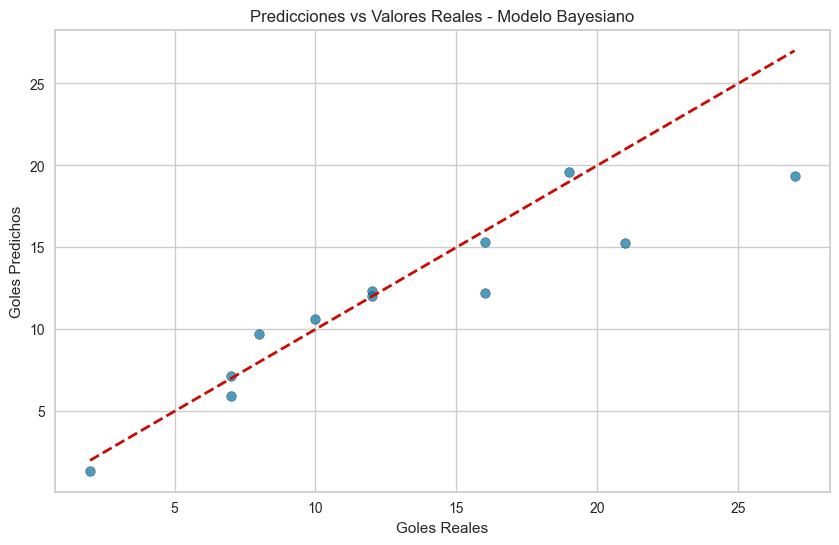

In [107]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_by, y_pred_by, alpha=0.7, edgecolor='k')
plt.plot([y_test_by.min(), y_test_by.max()], [y_test_by.min(), y_test_by.max()], 'r--', lw=2)
plt.xlabel('Goles Reales')
plt.ylabel('Goles Predichos')
plt.title('Predicciones vs Valores Reales - Modelo Bayesiano')
plt.grid(True)
plt.show()

In [108]:
salah_n = dela_tit_n[dela_tit_n['Nombre'].str.contains("mohamed salah", case=False,na=False)]
salah_n

,Rk,Nombre,Trans_Value,Season,Age,Nation,Pos,Team,Comp,MP,Min,90s,Starts,Subs,unSub,Gls,Ast,G+A,G-PK,PK,PKatt,PKm,Sh,G/Sh_S,G/SoT_S,SoT_S,SoT%_S,Dist_S,FK_S,Cmp_T,Att_T,Cmp%_T,KP_T,KP_1/3_T,PPA_T,CrsPA_T,PrgP_T,TotDist_T,PrgDist_T,Cmp_S,Att_S,Cmp%_S,Cmp_M,Att_M,Cmp%_M,Cmp_L,Att_L,Cmp%_L,SCA_S,PassLive_S,PassDead_S,TO_S,Sh_S,Fld_S,Def_S,GCA_G,PassLive_G,PassDead_G,TO_G,Sh_G,Fld_G,Def_G,Rec_R,PrgR_R,Carries_C,TotDist_C,PrgDist_C,Prg_C,C1/3_C,CPA_C,Mis_C,Dis_C,Tkl_T,TklW_T,Def_3rd_T,Mid_3rd_T,Att_3rd_T,Tkl_CH,Att_CH,Tkl%_CH,Lost_CH,Blocks_B,Sh_B,Pass_B,Int_B,Tkl+Int_B,Clr_B,Err_B,Won_A,Lost_A,Won%_A,Primary_Pos
191,111,Mohamed Salah,65.000000,2023-2024,31,eg EGY,FW,Liverpool,eng Premier League,32,2534,28.200000,28,4,0,18,10,28,13,5,7,2,107,0.120000,0.280000,47,43.900000,15.500000,1,737,1010,73.000000,66,56,68,6,147,10826,3213,433,510,84.900000,234,331,70.700000,43,65,66.200000,139,103,2,7,21,5,1,20,14,0,2,3,1,0,1116,341,977,5309,2614,98,54,66,77,59,17,11,1,8,8,6,21,28.600000,15,19,1,18,2,19,1,0,6,14,30.000000,FW


In [109]:
salah = salah_n[list(salah_n.loc[:, 'Sh':'FK_S'].columns)]
salah_sc = scaler.transform(salah)
salah_pred = model_baye.predict(salah_sc)
goles_v = salah_n['Gls'].values[0]
goles_pred = salah_pred[0]

print(goles_v)
print(goles_pred)

18
16.004261079384584


## XGBoost

In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [111]:
excluded_columns = ['Nombre', 'Nation', 'Pos', 'Team', 'Comp', 'Rk', 'Season']
data_xb = dtpr.drop(columns=excluded_columns)
data_xb = data_xb.fillna(0)

X = data_xb.drop(columns=['Trans_Value'])
y = data_xb['Trans_Value']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo XGBoost con parámetros ajustados
xgb_model_tuned = XGBRegressor(n_estimators=50, max_depth=3, learning_rate=0.1, random_state=42)
xgb_model_tuned.fit(X_train, y_train)

# Predicción y evaluación
y_pred_tuned = xgb_model_tuned.predict(X_test)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
r2_tuned = r2_score(y_test, y_pred_tuned)



In [113]:
player_name = "mohamed salah"

player_data = dtpr[dtpr['Nombre'].str.contains(player_name, case=False, na=False)].drop(columns=excluded_columns + ['Trans_Value'])

In [114]:
if player_data.empty:
    print(f"El jugador {player_name} no se encuentra en el conjunto de datos.")
else:
    predicted_value = xgb_model_tuned.predict(player_data)

    print(f"El valor de mercado predicho para {player_name} después de la temporada es: {predicted_value[0]:.2f} millones.")

El valor de mercado predicho para mohamed salah después de la temporada es: 52.84 millones.
